# Primer Ejemplo

Importamos librerias

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Generamos datos sintéticos

In [93]:
# Generar datos
A = np.random.normal(scale=1, size=(100,3))
B = np.array([x for x in np.random.normal(scale=5, size=(500,3)) if np.linalg.norm(x) > 7])

Graficamos

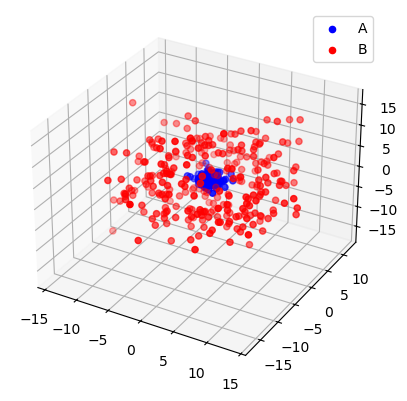

In [94]:
# Crear la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos
ax.scatter(A[:,0], A[:,1], A[:,2], label='A', color='blue')
ax.scatter(B[:,0], B[:,1], B[:,2], label='B', color='red')

# Añadir leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

Los datos sintéticos que acabamos de crear son básicamente dos clústeres de datos, uno centrado en el otro. 


Ahora, veamos qué pasa cuando aplicamos PCA.

In [95]:
X = np.r_[A,B]

In [96]:
X2 = PCA(n_components=2).fit_transform(X)

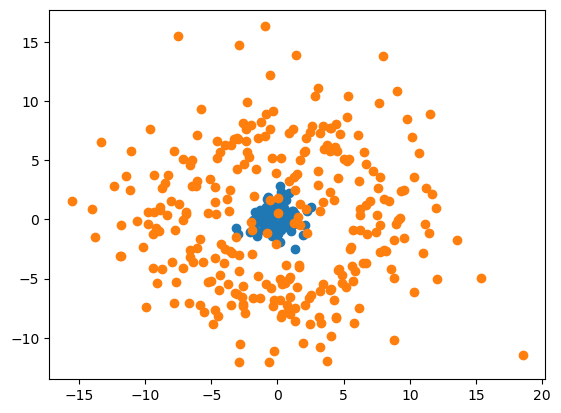

In [97]:
A2 = X2[:A.shape[0], :]
B2 = X2[A.shape[0]:, :]
plt.scatter(A2[:,0], A2[:,1])
plt.scatter(B2[:,0], B2[:,1])

Vemos que PCA hace que los dos clusters se superpongan completamente entre sí. PCA simplemente no tiene manera de dividir estos clústeres no lineales separados entre sí, ya que todo lo que realmente puede hacer es cortar los datos a través de un determinado plano: eso es lo que es una proyección lineal.

Ahora, veamos cómo se aplica t-SNE en este conjunto de datos

In [98]:
X3 = TSNE(n_components=2).fit_transform(X)

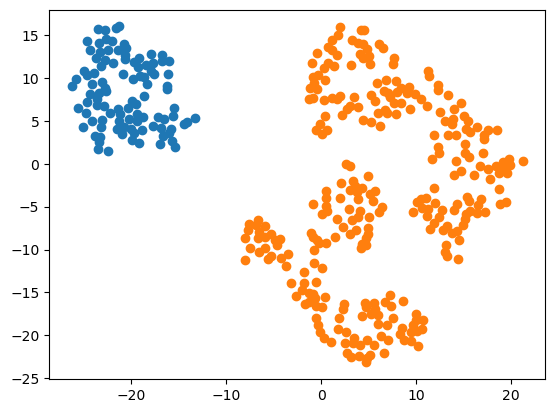

In [111]:
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])

Vemos que los puntos de los dos clústeres están mejor separados en dos clústers diferentes en el espacio bidimensional, cosa que no pudo hacer PCA. Además, no fue necesario ajustar ningún hiperparámetro para lograr estos resultados. Esto muestra lo robusto y eficaz que es t-SNE como método de reducción de la dimensionalidad.

Suele pasar en t-SNE que los resultados cambian en cada ejecución. Para comprobarlos, ejecutamos varias veces t-SNE.

In [84]:
def plot_tsne(random_seed):
    tsne = TSNE(n_components=2, random_state=random_seed)
    X3 = tsne.fit_transform(X)
    A3 = X3[:A.shape[0], :]
    B3 = X3[A.shape[0]:, :]
    plt.scatter(A3[:, 0], A3[:, 1], label='A', color='blue')
    plt.scatter(B3[:, 0], B3[:, 1], label='B', color='red')
    plt.legend()
    plt.title(f't-SNE Visualization with random seed {random_seed}')
    plt.show()

# Ejecutar la función plot_tsne varias veces para observar los cambios
for i in range(5):
    random_seed = np.random.randint(0, 10000)  # Generar una semilla aleatoria diferente
    plot_tsne(random_seed)

Vemos que éste no es el caso para el cual t-SNE genera graficos distintos.

Ahora, vamos a jugar con los hiperparámetros de t-SNE.

Primero, iremos variando con la perplejidad. 

t-SNE con perplejidad 1

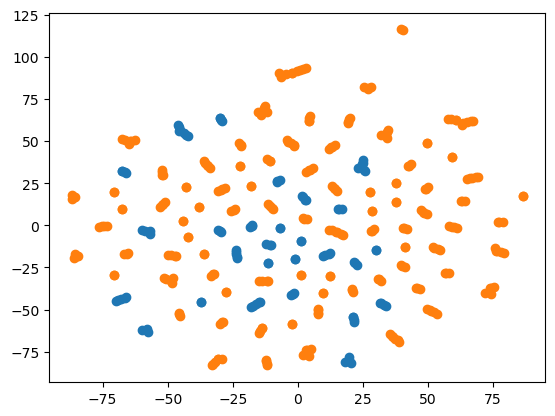

In [113]:
X3 = TSNE(n_components=2, perplexity=1).fit_transform(X)
A3 = X3[:A.shape[0],:]
B3 = X3[A.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])

Podemos ver que en el caso de la perplejidad 1, todos los puntos están dispersos sin estructura.

Esto tiene sentido, ya que establecer la perplejidad en 1 esencialmente significa que sólo miras a
un vecino, lo que hace que sea difícil encontrar la estructura local.

t-SNE con perplejidad 300

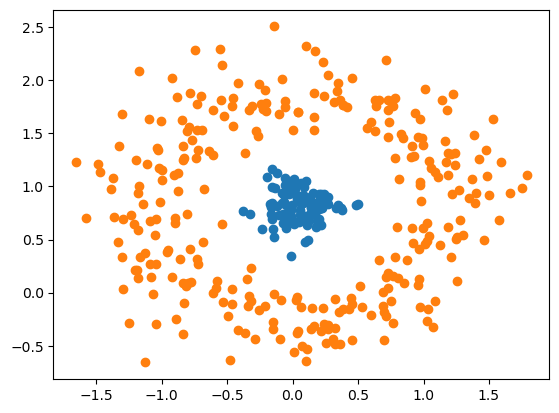

In [126]:
X3 = TSNE(n_components=2, perplexity=300).fit_transform(X)
A3 = X3[:A.shape[0],:]
B3 = X3[A.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])

Perplexity 300 agrupa todos los puntos en un blob.

A continuación, analizaremos la exageración temprana. Este hiperparámetro fortalece los lazos entre los puntos locales para crear clústeres más pequeños durante la optimización inicial. 

t-SNE con exageración temprana fijada en 1

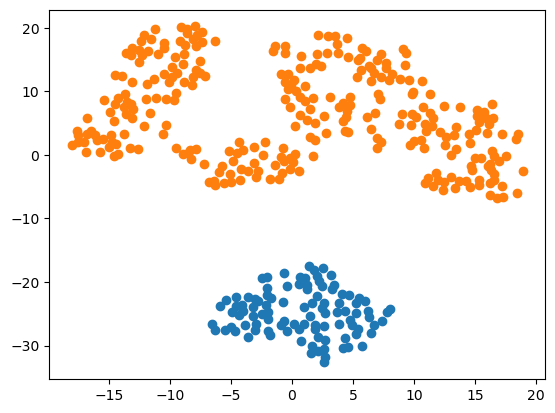

In [128]:
X3 = TSNE(n_components=2, early_exaggeration=1).fit_transform(X)
A3 = X3[:A.shape[0],:]
B3 = X3[A.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])

t-SNE con exageración temprana fijada en 500

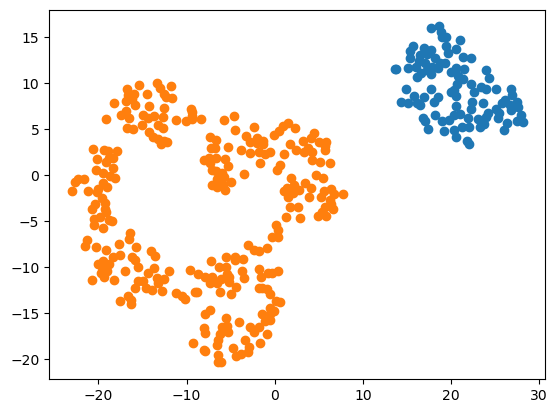

In [129]:
X3 = TSNE(n_components=2, early_exaggeration=500).fit_transform(X)
A3 = X3[:A.shape[0],:]
B3 = X3[A.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])

Establecer la exageración temprana en 1 o en 500 genera gráficos distintos.

# Segundo ejemplo

Importamos librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Datos: dataset de sklearn "MNIST"

In [130]:
# Cargar el conjunto de datos de dígitos
digits = load_digits()
X = digits.data
y = digits.target

load_digits() carga el dataset de dígitos que contiene imágenes de dígitos escritos a mano y sus etiquetas.

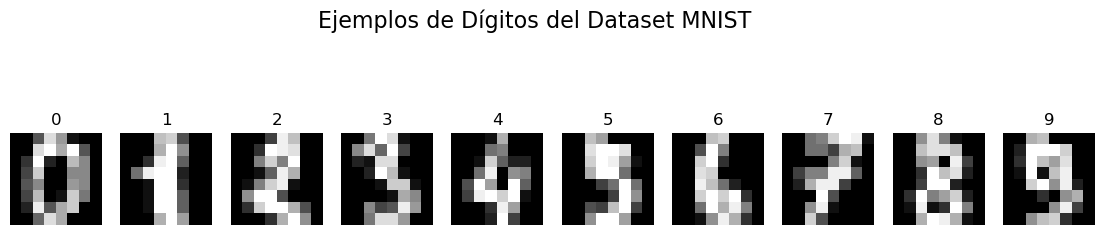

In [131]:
# Graficar algunos ejemplos de dígitos
plt.figure(figsize=(14, 12))
for i in range(10):  # Graficar 10 ejemplos de cada dígito
    plt.subplot(8, 10, i + 1)
    plt.imshow(X[y == i][0].reshape(8, 8), cmap='gray')
    plt.axis('off')
    plt.title(str(i), fontsize=12)

plt.suptitle('Ejemplos de Dígitos del Dataset MNIST', fontsize=16)
plt.show()

PCA

In [132]:
# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

t-SNE

In [133]:
# Reducir la dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

Visualizamos PCA vs t-SNE

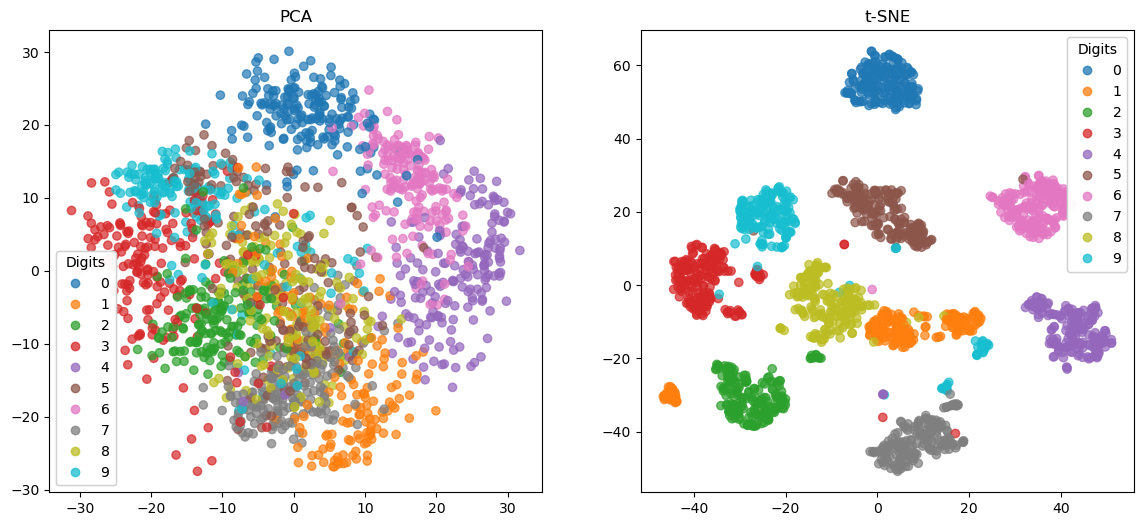

In [135]:
# Visualización de los resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# PCA
scatter_pca = ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
legend1 = ax[0].legend(*scatter_pca.legend_elements(), title="Digits")
ax[0].add_artist(legend1)
ax[0].set_title("PCA")

# t-SNE
scatter_tsne = ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
legend2 = ax[1].legend(*scatter_tsne.legend_elements(), title="Digits")
ax[1].add_artist(legend2)
ax[1].set_title("t-SNE")

plt.show() 

Podemos observar como PCA no logra captar las agrupaciones, mientras que t-SNE lo hace bastante mejor.

# Tercer ejemplo

Importamos librerías

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import make_swiss_roll

Utlizamos dataset make_swiss_roll de sklearn

In [140]:
# Generar datos
n_samples = 1000
noise = 0.1
X, color = make_swiss_roll(n_samples, noise=noise)

PCA

In [141]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

t-SNE

In [142]:
# Función para aplicar t-SNE con diferentes parámetros
def apply_tsne(X, perplexity, early_exaggeration):
    tsne = TSNE(n_components=2, perplexity=perplexity, 
                early_exaggeration=early_exaggeration, random_state=42)
    return tsne.fit_transform(X)

# Configuraciones de t-SNE para probar
tsne_configs = [
    (30, 12, "t-SNE (perplexity=30, early_exag=12)"),
    (5, 12, "t-SNE (perplexity=5, early_exag=12)"),
    (50, 12, "t-SNE (perplexity=50, early_exag=12)"),
    (30, 4, "t-SNE (perplexity=30, early_exag=4)"),
    (30, 20, "t-SNE (perplexity=30, early_exag=20)")
]

Graficamos

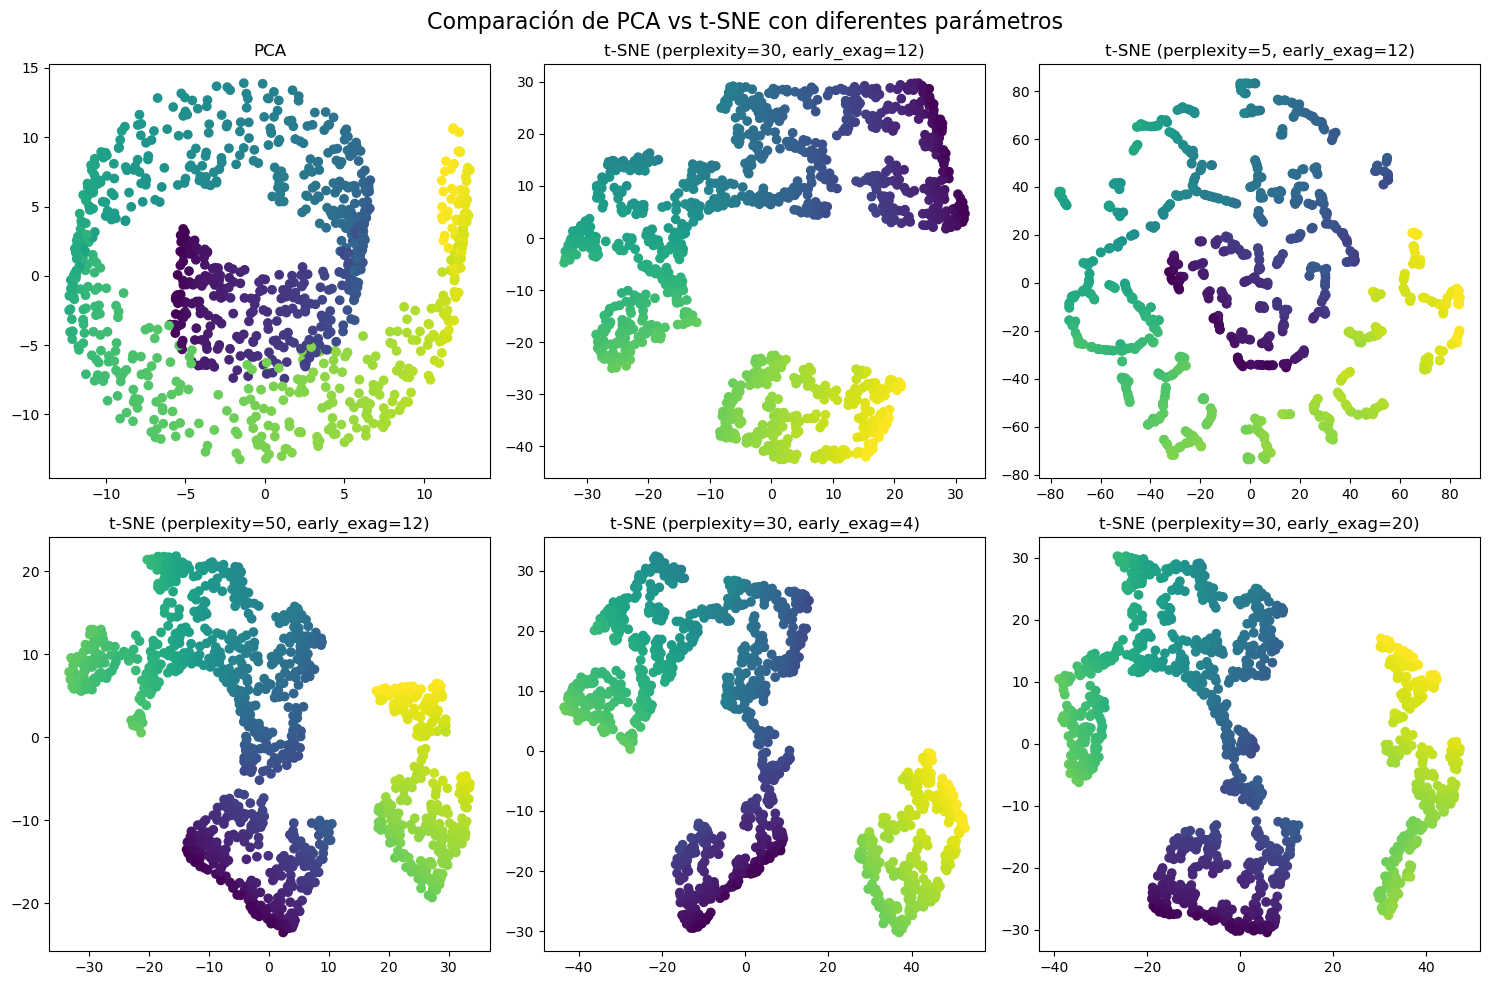

In [143]:
# Crear subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Comparación de PCA vs t-SNE con diferentes parámetros", fontsize=16)

# Graficar PCA
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.viridis)
axs[0, 0].set_title("PCA")

# Graficar t-SNE con diferentes configuraciones
for i, (perplexity, early_exag, title) in enumerate(tsne_configs):
    row = (i + 1) // 3
    col = (i + 1) % 3
    X_tsne = apply_tsne(X, perplexity, early_exag)
    axs[row, col].scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.viridis)
    axs[row, col].set_title(title)

plt.tight_layout()
plt.show()

Este código hace lo siguiente:
- Lee el dataset "swiss roll" de sklearn.
- Aplica PCA para reducir a 2D.
- Aplica t-SNE con diferentes configuraciones de perplexity y early_exaggeration.
- Visualiza los resultados.

Explicación de los resultados:
- PCA: muestra una proyección 2D que no puede desenrollar el "swiss roll". 
- t-SNE con diferentes configuraciones:
    - Logra "desenrollar" el swiss roll en la mayoría de los casos, preservando mejor la estructura de los datos.
    - Perplexity baja (5): Tiende a enfocarse en estructuras locales (fragmentando el roll).
    - Perplexity alta (50): Tiende a preservar estructuras más globales.
    - Early exaggeration baja (4): generalmente resulta en una separación menos clara.
    - Early exaggeration alta (20): generalmente tiende a exagerar la separación entre clusters.

Este ejemplo demuestra:
- La limitación de PCA para manejar estructuras de datos no lineales.
- La capacidad de t-SNE para preservar estructuras no lineales.
- Cómo diferentes parámetros de t-SNE afectan la visualización resultante.